In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from numpy import corrcoef,array
# from numpy import corrconf,array
from statsmodels.formula.api import ols
matplotlib.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
data = pd.read_csv(r'E:\Ajiao\LiXian\资料\技术实详解与商业实战\280_Ben_八大直播八大案例配套课件\第四章\sndHsPr.csv')
data

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268
...,...,...,...,...,...,...,...,...
16205,chaoyang,3,1,76.33,middle,1,0,52405
16206,chaoyang,3,1,76.42,middle,1,0,52343
16207,chaoyang,2,1,61.79,high,1,0,50170
16208,chaoyang,1,1,42.89,high,1,0,52693


In [3]:
数据：
    区、室 厅 面积 楼层（高层、中层、底层）

SyntaxError: invalid character in identifier (<ipython-input-3-5e89923316b3>, line 1)

- qq 图和PP 图来检验某个分布是否符合正态分布，在统计占有一定的地位，在数据分析的时候，直方图已经可以能够描述了

In [4]:
print('%d',data.shape[0])
# 样本量超过5000，p值就失去意义了
# 描述性统计的时候，样本量可以全部用；但是做统计检验和建模的时候是不能全部用样本量的
#  

%d 16210


In [5]:
dat0 = data
dat0.describe(include='all').T
# 竖列是统计量，横列是变量
# 连续变量：输出的是百分位数、中位数等
# 分类变量：输出的是频次信息

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dist,16210,6,fengtai,2947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roomnum,16210.0,NaN,NaN,NaN,2.166194,0.809907,1.0,2.0,2.0,3.0,5.0
halls,16210.0,NaN,NaN,NaN,1.221407,0.532048,0.0,1.0,1.0,2.0,3.0
AREA,16210.0,NaN,NaN,NaN,91.746598,44.000768,30.06,60.0,78.83,110.5175,299.0
floor,16210,3,middle,5580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subway,16210.0,NaN,NaN,NaN,0.827822,0.377546,0.0,1.0,1.0,1.0,1.0
school,16210.0,NaN,NaN,NaN,0.303085,0.459606,0.0,0.0,0.0,1.0,1.0
price,16210.0,NaN,NaN,NaN,61151.810919,22293.358147,18348.0,42812.25,57473.0,76099.75,149871.0


### 一、因变量分析（单因素分析）

In [6]:
#单位面积房价
dat0.price=dat0.price/10000 

In [7]:
dict1 = {
    u'chaoyang':'朝阳',
    u'dongcheng':'东城',
    u'fengtai':'丰台',
    u'haidian':'海淀',
    u'shijingshan':'石景山',
    u'xicheng':'西城'
}
dat0.dist = dat0.dist.apply(lambda x : dict1[x])
dat0.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,朝阳,1,0,46.06,middle,1,0,4.8850
1,朝阳,1,1,59.09,middle,1,0,4.6540
2,海淀,5,2,278.95,high,1,1,7.1662
3,海淀,3,2,207.00,high,1,1,5.7972
4,丰台,2,1,53.32,low,1,1,7.1268


-  步骤一：直方图
     - 数据分析中涉及连续变量：必须做直方图

Text(0, 0.5, '频数')

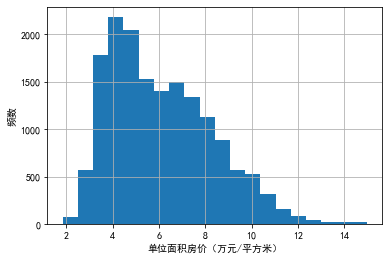

In [8]:
dat0.price.hist(bins=20)
plt.xlabel('单位面积房价（万元/平方米）')
plt.ylabel('频数')

- 步骤二：描述性统计分析
    - 查看中位数、标准差等

In [9]:
# 均值、中位数、标准差
dat0.price.agg(['mean','median','std'])

mean      6.115181
median    5.747300
std       2.229336
Name: price, dtype: float64

In [10]:
# 四分位数
dat0.price.quantile([0.25,0.5,0.75])

0.25    4.281225
0.50    5.747300
0.75    7.609975
Name: price, dtype: float64

In [11]:
#找出最低价格和最高价格对应的是哪个观测值
pd.concat([(dat0[dat0.price==min(dat0.price)]),(dat0[dat0.price==max(dat0.price)])])

,dist,roomnum,halls,AREA,floor,subway,school,price
2738,丰台,2,2,100.83,high,0,0,1.8348
12788,西城,3,1,77.40,low,1,0,14.9871


### x的分布情况
    - 连续变量找最小值、最大值、众数、中位数、均值
    - 分类变量进行频次分析(value_counts)

In [12]:
'''
根据数据可知，六个自变量有5个是分类变量，1个是连续变量；Y值是price
'''
for i in range(7):
    if i!=3:
        print(dat0.columns.values[i],':')
        print(dat0[dat0.columns.values[i]].agg(['value_counts']).T)
        print('------------------------------------------')
    else:
        continue
print('AREA:')
print(dat0.AREA.agg(['min','max','median','std']).T)
# 样本量/总样本数>=0.05,样本的数量就不算太少

dist :
                丰台    海淀    朝阳    东城    西城   石景山
value_counts  2947  2919  2864  2783  2750  1947
------------------------------------------
roomnum :
                 2     3     1    4    5
value_counts  7971  4250  3212  675  102
------------------------------------------
halls :
                  1     2    0   3
value_counts  11082  4231  812  85
------------------------------------------
floor :
              middle  high   low
value_counts    5580  5552  5078
------------------------------------------
subway :
                  1     0
value_counts  13419  2791
------------------------------------------
school :
                  0     1
value_counts  11297  4913
------------------------------------------
AREA:
min        30.060000
max       299.000000
median     78.830000
std        44.000768
Name: AREA, dtype: float64


- 分类变量是找频次

<AxesSubplot:ylabel='dist'>

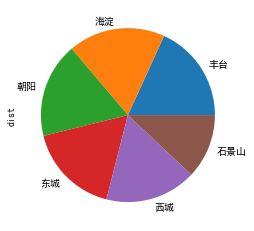

In [13]:
# 城区变量
data.dist.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='dist'>

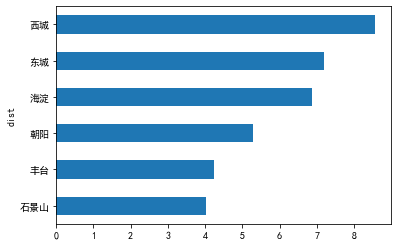

In [14]:
#看每个区的平均的房价为多少
data.price.groupby(dat0.dist).mean().sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:xlabel='dist', ylabel='price'>

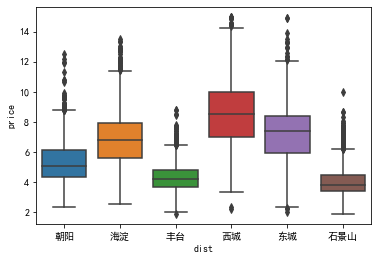

In [15]:
#盒须图
sns.boxplot(x='dist',y='price',data=dat0[['dist','price']])

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Anaconda\lib\site-packages\pandas\core\arrays\categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


<AxesSubplot:xlabel='dist', ylabel='price'>

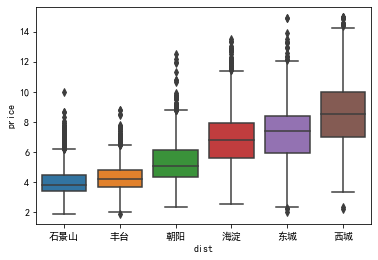

In [16]:
# 升序的盒须图
dat1=dat0[['dist','price']]
# 转为分类变量
dat1.dist = dat1.dist.astype('category')
dat1.dist.cat.set_categories(['石景山','丰台','朝阳','海淀','东城','西城'],inplace=True)
sns.boxplot(x='dist',y='price',data=dat1)

In [16]:
看城区对价格有无影响
    城区的中位数是否相等：若中位数不一样则两个变量是有关系的，所以城区对价格有预测作用，
                            可以纳入回归模型中。

IndentationError: unexpected indent (<ipython-input-16-20a11a80c0c1>, line 2)

#### 卧室的数量对价格是否有影响


In [ ]:
不同卧室的房价差别不大，

#### 地铁房、学区房对价格的影响

## 连续变量

In [ ]:
- 连续变量画散点图时：左密集右疏散==》右偏函数
- 分类变量作直方图时，右偏

In [ ]:
相关系数
    p>0.8 : 强相关
    0.5<p<0.8 : 中度相关
    p<0.3 : 弱相关或不相关
    
    作两两变量之间分析的时候，相关系数<0.3，是不考虑的。
    做建模的时候或多个变量之间分析的时候或逻辑回归、神经网络的时候，相关系数小于0.3，是要考虑的。

In [ ]:
#  对连续变量自身（AREA）进行分析

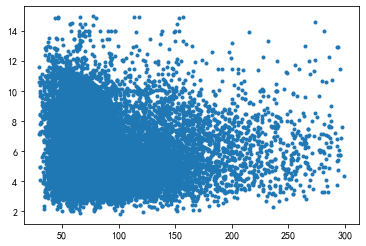

In [17]:
datA = dat0[['AREA','price']]
plt.scatter(datA.AREA,datA.price,marker='.')

In [18]:
#pearson相关系数
datA[['AREA','price']].corr(method='pearson')

,AREA,price
AREA,1.000000,-0.073955
price,-0.073955,1.000000


In [19]:
一、右偏函数对y取对数

SyntaxError: invalid character in identifier (<ipython-input-19-497a2258f575>, line 1)

<ipython-input-19-bf9b75a39bf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datA['price_ln'] = np.log(datA['price'])


Text(0, 0.5, '单位面积房价（取对数后）')

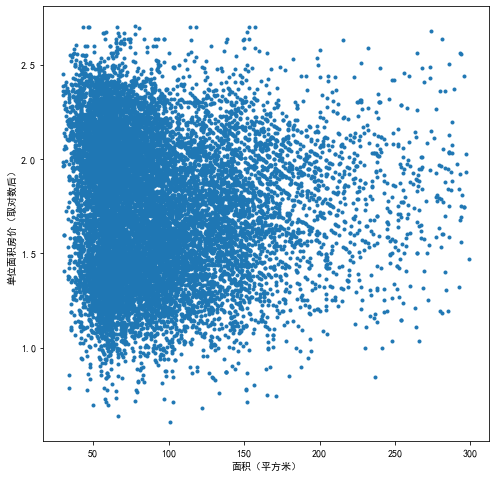

In [19]:
# 对Y取对数
datA['price_ln'] = np.log(datA['price'])
plt.figure(figsize=(8,8))
plt.scatter(datA.AREA,datA.price_ln,marker='.')
plt.xlabel('面积（平方米）')
plt.ylabel('单位面积房价（取对数后）')

#结果类似三角关系，散点结果点仍较密，相关系数比委屈对数前下降了，考虑对x取对数

In [20]:
#取对数之后的相关系数
datA[['AREA','price_ln']].corr(method='pearson')
# 散点图结果类似三角关系，散点结果点仍较密，相关系数比未对Y取对数前下降了，考虑对x取对数
#一般来说取对数之后，相关系数应该升高

,AREA,price_ln
AREA,1.000000,-0.058118
price_ln,-0.058118,1.000000


<ipython-input-21-ba8f99385d3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datA['AREA_ln'] = np.log(datA['AREA'])
<ipython-input-21-ba8f99385d3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datA['price_ln'] = np.log(datA['price'])


Text(0, 0.5, '单位面积房价（取对数后）')

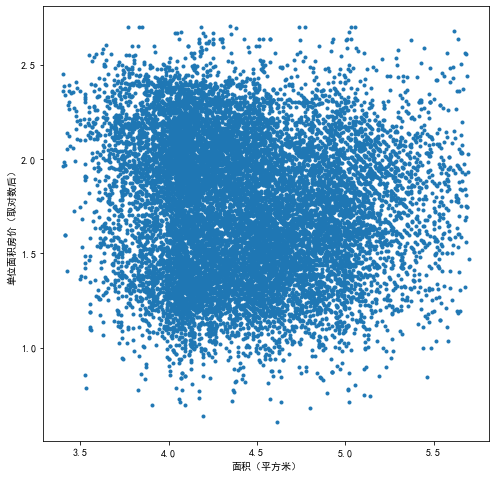

In [21]:
datA['AREA_ln'] = np.log(datA['AREA'])
datA['price_ln'] = np.log(datA['price'])
plt.figure(figsize=(8,8))
plt.scatter(datA.AREA_ln,datA.price_ln,marker='.')
plt.xlabel('面积（平方米）')
plt.ylabel('单位面积房价（取对数后）')
# 图形为中间密两边疏的状态，这样的图无论是X分布还是Y分布都是正态分布，而且相关系数变高了

In [22]:
datA[['AREA_ln','price_ln']].corr(method='pearson')

,AREA_ln,price_ln
AREA_ln,1.00000,-0.09393
price_ln,-0.09393,1.00000


In [23]:
def stack2dim(raw, i, j, rotation = 0, location = 'upper left'):
    '''
    此函数是为了画两个维度标准化的堆积柱状图
    要求是目标变量j是二分类的
    raw为pandas的DataFrame数据框
    i、j为两个分类变量的变量名称，要求带引号，比如"school"
    rotation：水平标签旋转角度，默认水平方向，如标签过长，可设置一定角度，比如设置rotation = 40
    location：分类标签的位置，如果被主体图形挡住，可更改为'upper left'
    
    '''
    import math
    data_raw = pd.crosstab(raw[i], raw[j])
    data = data_raw.div(data_raw.sum(1), axis=0)  # 交叉表转换成比率，为得到标准化堆积柱状图
    
    # 计算x坐标，及bar宽度
    createVar = locals()
    x = [0] #每个bar的中心x轴坐标
    width = [] #bar的宽度
    k = 0
    for n in range(len(data)):
        # 根据频数计算每一列bar的宽度
        createVar['width' + str(n)] = data_raw.sum(axis=1)[n] / sum(data_raw.sum(axis=1))
        width.append(createVar['width' + str(n)])  
        if n == 0:
            continue
        else:
            k += createVar['width' + str(n - 1)] / 2 + createVar['width' + str(n)] / 2 + 0.05
            x.append(k)  
    
    # 以下是通过频率交叉表矩阵生成一列对应堆积图每一块位置数据的数组，再把数组转化为矩阵
    y_mat = []
    n = 0
    for p in range(data.shape[0]):
        for q in range(data.shape[1]):
            n += 1
            y_mat.append(data.iloc[p, q])
            if n == data.shape[0] * 2:
                break
            elif n % 2 == 1:
                y_mat.extend([0] * (len(data) - 1))
            elif n % 2 == 0:
                y_mat.extend([0] * len(data))

    y_mat = np.array(y_mat).reshape(len(data) * 2, len(data))
    y_mat = pd.DataFrame(y_mat)  # bar图中的y变量矩阵，每一行是一个y变量
    
    # 通过x，y_mat中的每一行y，依次绘制每一块堆积图中的每一块图
    createVar = locals()
    for row in range(len(y_mat)):
        createVar['a' + str(row)] = y_mat.iloc[row, :]
        if row % 2 == 0:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], label='0', color='#5F9EA0')
            else:
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], color='#5F9EA0')
        elif row % 2 == 1:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], label='1', color='#8FBC8F')
            else:
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], color='#8FBC8F')

    plt.title(j + ' vs ' + i)
    group_labels = [data.index.name + ': ' + str(name) for name in data.index]
    plt.xticks(x, group_labels, rotation = rotation)
    plt.ylabel(j)
    plt.legend(shadow=True, loc=location)
    plt.show()


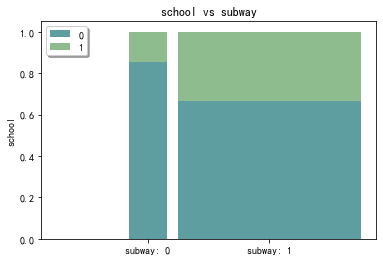

In [24]:
# 标准化堆积柱状图
stack2dim(dat0, i="subway", j="school")

<AxesSubplot:title={'center':'price'}, xlabel='[school]'>

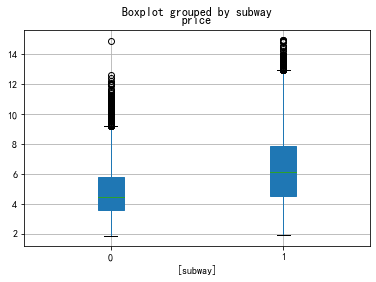

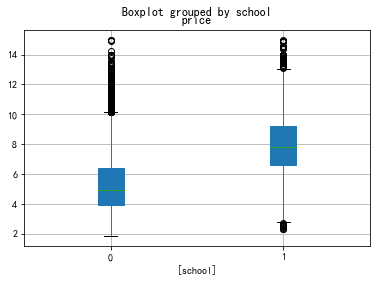

In [25]:
#箱线图
dat2=dat0[['subway','price']]
dat3=dat0[['school','price']]
dat2.boxplot(by='subway',patch_artist=True)
dat3.boxplot(by='school',patch_artist=True)

## 假设检验

In [ ]:
- 描述性统计是提出假设的前提条件，不要拿原始数据作检验，抽样进行检验

阈值根据样本量设置的，
    样本量n<100,显著度取值[5%,20%]
    100<样本量n<500,显著度取值[1%,10%]
    500<样本量n<3000,显著度取值[0.1%,5%]
样本量特别大，p值可以非常小，但是当样本量足够大时p值就没有意义了，目前没有更好的解决方案

In [ ]:
# 按区抽样，每个区抽400个样本
# 因为是随机抽样，所以每次的P值是不一样的，但是结论是一致的。

In [26]:
def get_sample(df, sampling="simple_random", k=1, stratified_col=None):
    """
    对输入的 dataframe 进行抽样的函数

    参数:
        - df: 输入的数据框 pandas.dataframe 对象

        - sampling:抽样方法 str
            可选值有 ["simple_random", "stratified", "systematic"]
            按顺序分别为: 简单随机抽样、分层抽样、系统抽样

        - k: 抽样个数或抽样比例 int or float
            (int, 则必须大于0; float, 则必须在区间(0,1)中)
            如果 0 < k < 1 , 则 k 表示抽样对于总体的比例
            如果 k >= 1 , 则 k 表示抽样的个数；当为分层抽样时，代表每层的样本量

        - stratified_col: 需要分层的列名的列表 list
            只有在分层抽样时才生效

    返回值:
        pandas.dataframe 对象, 抽样结果
    """
    import random
    import pandas as pd
    from functools import reduce
    import numpy as np
    import math
    
    len_df = len(df)
    if k <= 0:
        raise AssertionError("k不能为负数")
    elif k >= 1:
        assert isinstance(k, int), "选择抽样个数时, k必须为正整数"
        sample_by_n=True
        if sampling is "stratified":
            alln=k*df.groupby(by=stratified_col)[stratified_col[0]].count().count() # 有问题的
            #alln=k*df[stratified_col].value_counts().count() 
            if alln >= len_df:
                raise AssertionError("请确认k乘以层数不能超过总样本量")
    else:
        sample_by_n=False
        if sampling in ("simple_random", "systematic"):
            k = math.ceil(len_df * k)
        
    #print(k)

    if sampling is "simple_random":
        print("使用简单随机抽样")
        idx = random.sample(range(len_df), k)
        res_df = df.iloc[idx,:].copy()
        return res_df

    elif sampling is "systematic":
        print("使用系统抽样")
        step = len_df // k+1          #step=len_df//k-1
        start = 0                  #start=0
        idx = range(len_df)[start::step]  #idx=range(len_df+1)[start::step]
        res_df = df.iloc[idx,:].copy()
        #print("k=%d,step=%d,idx=%d"%(k,step,len(idx)))
        return res_df

    elif sampling is "stratified":
        assert stratified_col is not None, "请传入包含需要分层的列名的列表"
        assert all(np.in1d(stratified_col, df.columns)), "请检查输入的列名"
        
        grouped = df.groupby(by=stratified_col)[stratified_col[0]].count()
        if sample_by_n==True:
            group_k = grouped.map(lambda x:k)
        else:
            group_k = grouped.map(lambda x: math.ceil(x * k))
        
        res_df = df.head(0)
        for df_idx in group_k.index:
            df1=df
            if len(stratified_col)==1:
                df1=df1[df1[stratified_col[0]]==df_idx]
            else:
                for i in range(len(df_idx)):
                    df1=df1[df1[stratified_col[i]]==df_idx[i]]
            idx = random.sample(range(len(df1)), group_k[df_idx])
            group_df = df1.iloc[idx,:].copy()
            res_df = res_df.append(group_df)
        return res_df

    else:
        raise AssertionError("sampling is illegal")


<>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:62: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:62: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-26-a7920ac9c4a3>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sampling is "stratified":
<ipython-input-26-a7920ac9c4a3>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if sampling is "simple_random":
<ipython-input-26-a7920ac9c4a3>:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif sampling is "systematic":
<ipython-input-26-a7920ac9c4a3>:62: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif sampling is "stratified":


In [27]:
# 分层抽样:多进行几次，每次结果不同  但是结论是一致的
dat01=get_sample(dat0, sampling="stratified", k=400, stratified_col=['dist'])
dat01

,dist,roomnum,halls,AREA,floor,subway,school,price
1426,东城,1,1,50.86,low,1,1,7.3732
8932,东城,3,1,77.72,low,1,1,7.7201
9041,东城,1,1,49.64,high,1,1,7.6552
13325,东城,1,1,86.00,low,1,0,6.9768
11918,东城,1,1,46.80,low,1,0,4.1881
...,...,...,...,...,...,...,...,...
2198,西城,2,1,60.90,low,1,1,8.2923
8410,西城,3,1,62.08,high,0,1,7.7320
9528,西城,2,1,105.50,high,1,0,11.2607
11654,西城,2,1,56.30,high,0,1,10.8349


In [28]:
# 因为自变量都是分类变量，所以进行方差分析
import statsmodels.api as sm
from statsmodels.formula.api import ols
print('dist的P值为：.4f'%sm.stats.anova_lm(ols('price~C(dist)',data=dat01).fit())._values[0][4])
print('roomnum的P值为：%.4f'%sm.stats.anova_lm(ols('price~C(roomnum)',data=dat01).fit())._values[0][4])
print("halls的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(halls)',data=dat01).fit())._values[0][4])#高于0.001->边际显著->暂时考虑
print("floor的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(floor)',data=dat01).fit())._values[0][4])#高于0.001->边际显著->暂时考虑
print("subway的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(subway)',data=dat01).fit())._values[0][4])
print("school的P值为:%.4f" %sm.stats.anova_lm(ols('price ~ C(school)',data=dat01).fit())._values[0][4])

dist的P值为：.4f
roomnum的P值为：0.4926
halls的P值为:0.7153
floor的P值为:0.1063
subway的P值为:0.0000
school的P值为:0.0000


In [29]:
# 有的变量跳跃性比较大，对其进行编码，如厅的数量影响不大，变为有无厅（0-1变量）===》成为二分类变量
dat01['style_new'] = dat01.halls
dat01.style_new[dat01.style_new>0]='有厅'
dat01.style_new[dat01.style_new==0]='无厅'
dat01.head()

<ipython-input-29-fe8c2b985f5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat01.style_new[dat01.style_new>0]='有厅'
<ipython-input-29-fe8c2b985f5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat01.style_new[dat01.style_new==0]='无厅'


,dist,roomnum,halls,AREA,floor,subway,school,price,style_new
1426,东城,1,1,50.86,low,1,1,7.3732,有厅
8932,东城,3,1,77.72,low,1,1,7.7201,有厅
9041,东城,1,1,49.64,high,1,1,7.6552,有厅
13325,东城,1,1,86.00,low,1,0,6.9768,有厅
11918,东城,1,1,46.80,low,1,0,4.1881,有厅


In [30]:
# 对于多分类变量：放入模型的时候做一个哑变量编码，并设置基准--完全可以在ols函数中使用C参数来处理虚拟变量
datta = pd.get_dummies(dat01[['dist','floor']])
datta.head()

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_石景山,dist_西城,floor_high,floor_low,floor_middle
1426,1,0,0,0,0,0,0,1,0
8932,1,0,0,0,0,0,0,1,0
9041,1,0,0,0,0,0,1,0,0
13325,1,0,0,0,0,0,0,1,0
11918,1,0,0,0,0,0,0,1,0


In [31]:
#这两个是参照组-在线性回归中使用C函数也可以
datta.drop(['dist_石景山','floor_high'],axis=1,inplace=True)
datta.head()

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_西城,floor_low,floor_middle
1426,1,0,0,0,0,1,0
8932,1,0,0,0,0,1,0
9041,1,0,0,0,0,0,0
13325,1,0,0,0,0,1,0
11918,1,0,0,0,0,1,0


In [32]:
#生成的哑变量与其他所需变量合并成新的数据框
dat1 = pd.concat([datta,dat01[['school','subway','style_new','roomnum','AREA','price']]],axis=1)
dat1.head()

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_西城,floor_low,floor_middle,school,subway,style_new,roomnum,AREA,price
1426,1,0,0,0,0,1,0,1,1,有厅,1,50.86,7.3732
8932,1,0,0,0,0,1,0,1,1,有厅,3,77.72,7.7201
9041,1,0,0,0,0,0,0,1,1,有厅,1,49.64,7.6552
13325,1,0,0,0,0,1,0,0,1,有厅,1,86.00,6.9768
11918,1,0,0,0,0,1,0,0,1,有厅,1,46.80,4.1881


# 线性回归模型

In [33]:
#OLS:回归不带截距项的（不常用），ols:是常用的
from statsmodels.formula.api import ols
lm1 = ols('price ~ dist_丰台+dist_朝阳+dist_东城+dist_海淀+dist_西城+school+subway+floor_middle+floor_low+AREA',
         data=dat1).fit()
'''
ols的y必须是连续变量，x可以是连续的或者分类的，若x为分类变量，
可以用C（）代替建立哑变量
'''


lm1_summary= lm1.summary()
lm1_summary  #回归结果显示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     344.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:01:19   Log-Likelihood:                -4284.3
No. Observations:                2400   AIC:                             8591.
Df Residuals:                    2389   BIC:                             8654.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.5637      0.112     31.800      0.000       3.344       3.784
dist_丰台          0.1121      0.104      1.083      0.279      -0.091       0.315
dist_朝阳          0.9058      0.108      8.402      0.000       0.694       1.117
dist_东城          2.3271      0.110     21.080      0.000       2.111       2.544
dist_海淀          2.1946      0.109     20.051      0.000       1.980       2.409
dist_西城          3.7802      0.113     33.308      0.000       3.558       4.003
school           1.1504      0.075     15.383      0.000       1.004       1.297
subway           0.6145      0.081      7.563      0.000       0.455       0.774
floor_middle     0.1980      0.071      2.805      0.005       0.060       0.336
floor_low        0.2128      0.073      2.916      0.004       0.070       0.356
AREA            -0.0003      0.001     -0.450      0.653      -0.002       0.001
==============================================================================
Omnibus:                      169.266   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.378
Skew:                           0.542   Prob(JB):                     2.63e-60
Kurtosis:                       4.252   Cond. No.                         691.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lm1 = ols("price ~ C(dist)+school+subway+C(floor)+AREA", data=dat01).fit()
lm1_summary = lm1.summary()
lm1_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     344.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:01:24   Log-Likelihood:                -4284.3
No. Observations:                2400   AIC:                             8591.
Df Residuals:                    2389   BIC:                             8654.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.8908      0.134     43.821      0.000       5.627       6.154
C(dist)[T.丰台]         -2.2150      0.107    -20.693      0.000      -2.425      -2.005
C(dist)[T.朝阳]         -1.4213      0.105    -13.596      0.000      -1.626      -1.216
C(dist)[T.海淀]         -0.1325      0.103     -1.285      0.199      -0.335       0.070
C(dist)[T.石景山]        -2.3271      0.110    -21.080      0.000      -2.544      -2.111
C(dist)[T.西城]          1.4531      0.103     14.057      0.000       1.250       1.656
C(floor)[T.low]        0.2128      0.073      2.916      0.004       0.070       0.356
C(floor)[T.middle]     0.1980      0.071      2.805      0.005       0.060       0.336
school                 1.1504      0.075     15.383      0.000       1.004       1.297
subway                 0.6145      0.081      7.563      0.000       0.455       0.774
AREA                  -0.0003      0.001     -0.450      0.653      -0.002       0.001
==============================================================================
Omnibus:                      169.266   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.378
Skew:                           0.542   Prob(JB):                     2.63e-60
Kurtosis:                       4.252   Cond. No.                         717.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
· 由于之前做散点图时（连续变量分析时），要对Y取对数；
· Y本身的分布的时候（因变量分析时），要对Y取对数

In [ ]:
· 理论依据：根据模型做了个预测，看模型的残差。

In [35]:
dat1

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_西城,floor_low,floor_middle,school,subway,style_new,roomnum,AREA,price
1426,1,0,0,0,0,1,0,1,1,有厅,1,50.86,7.3732
8932,1,0,0,0,0,1,0,1,1,有厅,3,77.72,7.7201
9041,1,0,0,0,0,0,0,1,1,有厅,1,49.64,7.6552
13325,1,0,0,0,0,1,0,0,1,有厅,1,86.00,6.9768
11918,1,0,0,0,0,1,0,0,1,有厅,1,46.80,4.1881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0,0,0,0,1,1,0,1,1,有厅,2,60.90,8.2923
8410,0,0,0,0,1,0,0,1,0,有厅,3,62.08,7.7320
9528,0,0,0,0,1,0,0,0,1,有厅,2,105.50,11.2607
11654,0,0,0,0,1,0,0,1,0,有厅,2,56.30,10.8349


In [36]:
dat01

,dist,roomnum,halls,AREA,floor,subway,school,price,style_new
1426,东城,1,1,50.86,low,1,1,7.3732,有厅
8932,东城,3,1,77.72,low,1,1,7.7201,有厅
9041,东城,1,1,49.64,high,1,1,7.6552,有厅
13325,东城,1,1,86.00,low,1,0,6.9768,有厅
11918,东城,1,1,46.80,low,1,0,4.1881,有厅
...,...,...,...,...,...,...,...,...,...
2198,西城,2,1,60.90,low,1,1,8.2923,有厅
8410,西城,3,1,62.08,high,0,1,7.7320,有厅
9528,西城,2,1,105.50,high,1,0,11.2607,有厅
11654,西城,2,1,56.30,high,0,1,10.8349,有厅


'\n异方差：随着预测值的增加，残差在增加\n\n该图为异方差，应对Y取对数\n'

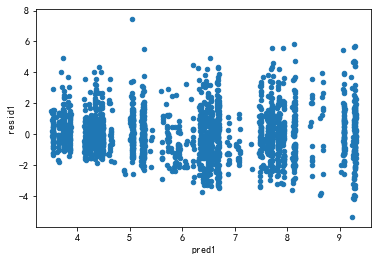

In [37]:
dat1['pred1'] = lm1.predict(dat01) # 对模型取预测
dat1['resid1'] = lm1.resid        # 取残差
dat1.plot('pred1','resid1',kind='scatter')
#pred1（预测值）为x，resid1(残差)为y，做散点图。
'''
异方差：随着预测值的增加，残差在增加

该图为异方差，应对Y取对数
'''

In [ ]:
· 取对数 重新放入模型

In [41]:
dat1['price_ln'] = np.log(dat1['price'])# y值取对数
dat1['AREA_ln'] = np.log(dat1['AREA'])  # x取对数

In [45]:
lm2 = ols("price_ln ~ dist_丰台+dist_朝阳+dist_东城+dist_海淀+dist_西城+school+subway+floor_middle+floor_low+AREA_ln", data=dat1).fit()
lm2_summary = lm2.summary()
lm2_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     363.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:35:05   Log-Likelihood:                 105.70
No. Observations:                2400   AIC:                            -189.4
Df Residuals:                    2389   BIC:                            -125.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3167      0.053     25.028      0.000       1.214       1.420
dist_丰台          0.0446      0.017      2.682      0.007       0.012       0.077
dist_朝阳          0.2113      0.017     12.216      0.000       0.177       0.245
dist_东城          0.4420      0.018     24.980      0.000       0.407       0.477
dist_海淀          0.4344      0.018     24.729      0.000       0.400       0.469
dist_西城          0.6332      0.018     34.769      0.000       0.597       0.669
school           0.1640      0.012     13.659      0.000       0.140       0.188
subway           0.1125      0.013      8.624      0.000       0.087       0.138
floor_middle     0.0376      0.011      3.322      0.001       0.015       0.060
floor_low        0.0382      0.012      3.262      0.001       0.015       0.061
AREA_ln         -0.0093      0.012     -0.804      0.422      -0.032       0.013
==============================================================================
Omnibus:                       11.094   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.449
Skew:                          -0.036   Prob(JB):                     0.000729
Kurtosis:                       3.373   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

· 变量没有变，只是取对数，R^2增加
· 调整之后，模型每个变量都显著了
· 因为Y取对数，所以按百分比解释，即丰台山的房价比石景山的房价贵4%，学区房比非学区房贵16%
· 房屋的面积每增加一个百分点，房屋的价格会下降0.93个百分点。

# 有交互项的影响
 - x1、x2作为交互项的形式（x1*x2）放入模型，
 - 在不同的地方影响的斜率不同，考虑交互项
 - 

In [ ]:
## 描述性统计 ：看学区房的价格

In [47]:
schools =['丰台','朝阳','海淀','西城','东城']
print('石景山非学区房\t',round(dat0[(dat0['dist']=='石景山')&(dat0['school']==0)]['price'].mean(),2),'万元/平方米\t',
     '石景山学区房\t',round(dat0[(dat0['dist']=='石景山')&(dat0['school']==1)]['price'].mean(),2),'万元/平方米')
print('-------------------------------------------------------------------------')
for i in schools:
    print(i+'非学区房\t',round(dat1[(dat1['dist_'+i]==1)&(dat1['school']==0)]['price'].mean(),2),'万元/平方米\t',i+'学区房\t',round(dat1[(dat1['dist_'+i]==1)&(dat1['school']==1)]['price'].mean(),2),'万元/平方米')

石景山非学区房	 4.04 万元/平方米	 石景山学区房	 3.31 万元/平方米
-------------------------------------------------------------------------
丰台非学区房	 4.28 万元/平方米	 丰台学区房	 4.94 万元/平方米
朝阳非学区房	 5.24 万元/平方米	 朝阳学区房	 5.75 万元/平方米
海淀非学区房	 6.19 万元/平方米	 海淀学区房	 7.66 万元/平方米
西城非学区房	 7.8 万元/平方米	 西城学区房	 9.29 万元/平方米
东城非学区房	 6.55 万元/平方米	 东城学区房	 7.77 万元/平方米


In [49]:
###构造图形揭示不同城区是否学区房的价格问题
df=pd.DataFrame()
dist=['石景山','丰台','朝阳','东城','海淀','西城']
Noschool=[]
school=[]
for i in dist:
    Noschool.append(dat0[(dat0['dist']==i)&(dat0['school']==0)]['price'].mean())
    school.append(dat0[(dat0['dist']==i)&(dat0['school']==1)]['price'].mean())

df['dist']=pd.Series(dist)
df['Noschool']=pd.Series(Noschool)
df['school']=pd.Series(school)
df

,dist,Noschool,school
0,石景山,4.035388,3.310733
1,丰台,4.229100,4.887162
2,朝阳,5.158851,5.740341
3,东城,6.627689,7.851490
4,海淀,6.138580,7.691126
5,西城,7.698937,9.246887


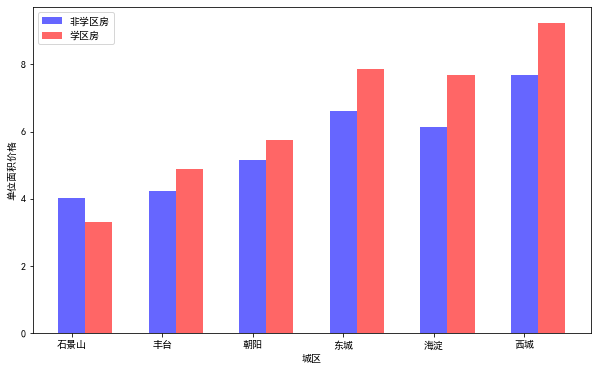

In [53]:
#描述性统计
df1 = df['Noschool'].T.values
df2 = df['school'].T.values
plt.figure(figsize=(10,6))
x1 = range(0,len(df))
x2=[i+0.3 for i in x1]
plt.bar(x1,df1,color='b',width=0.3,alpha=0.6,label='非学区房')
plt.bar(x2,df2,color='r',width=0.3,alpha=0.6,label='学区房')
plt.xlabel('城区')
plt.ylabel('单位面积价格')
plt.legend(loc='upper left')
plt.xticks(range(0,6),dist)
plt.show()

In [59]:
#最好是看分类：盒须图


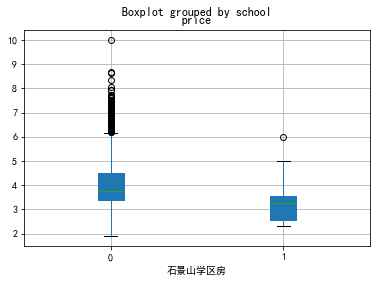

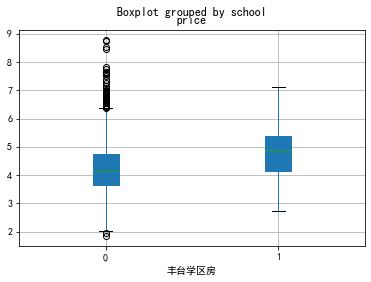

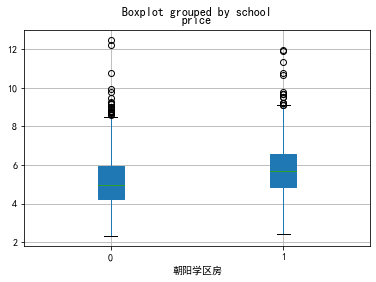

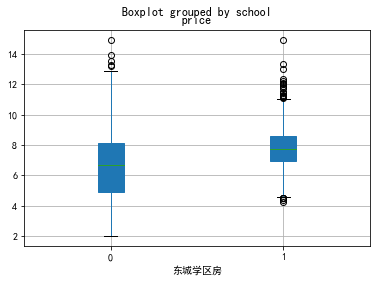

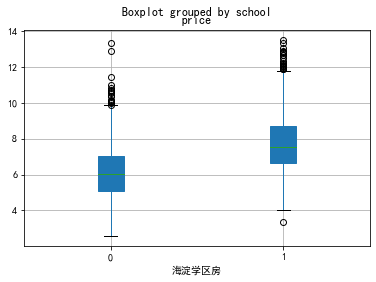

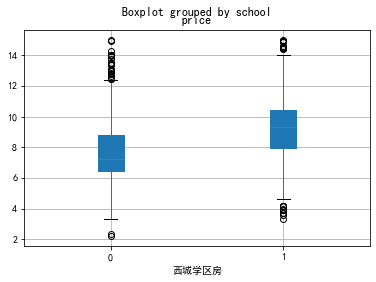

In [54]:
###分城区的学区房分组箱线图
school=['石景山','丰台','朝阳','东城','海淀','西城']
for i in school:
    dat0[dat0.dist==i][['school','price']].boxplot(by='school',patch_artist=True)
    plt.xlabel(i+'学区房')

In [ ]:
- 每个区的有无学区房的影响
- 盒须图：看两个图中的均值的差值是否一样
- 或者直接放入模型，看p值是否显著。重要的交互项之间需要考虑，按城区分、是否学区房、是否临近地铁这三项本身的P值是显著的，可以考虑交互项。

In [68]:
###有交互项的对数线性模型，城区和学区之间的交互作用
lm3 = ols("price_ln ~ (dist_丰台+dist_朝阳+dist_东城+dist_海淀+dist_西城)*school+subway+floor_middle+floor_low+AREA_ln", data=dat1).fit()
lm3_summary = lm3.summary()
lm3_summary  #回归结果展示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:12:27   Log-Likelihood:                 125.06
No. Observations:                2400   AIC:                            -218.1
Df Residuals:                    2384   BIC:                            -125.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3277      0.052     25.359      0.000       1.225       1.430
dist_丰台            0.0425      0.017      2.543      0.011       0.010       0.075
dist_朝阳            0.2261      0.018     12.585      0.000       0.191       0.261
dist_东城            0.4244      0.020     21.619      0.000       0.386       0.463
dist_海淀            0.4111      0.020     20.678      0.000       0.372       0.450
dist_西城            0.6168      0.022     27.995      0.000       0.574       0.660
school            -0.3738      0.116     -3.218      0.001      -0.602      -0.146
dist_丰台:school     0.4801      0.130      3.681      0.000       0.224       0.736
dist_朝阳:school     0.4414      0.120      3.685      0.000       0.207       0.676
dist_东城:school     0.5699      0.119      4.809      0.000       0.338       0.802
dist_海淀:school     0.5773      0.119      4.870      0.000       0.345       0.810
dist_西城:school     0.5584      0.118      4.713      0.000       0.326       0.791
subway             0.1075      0.013      8.256      0.000       0.082       0.133
floor_middle       0.0408      0.011      3.616      0.000       0.019       0.063
floor_low          0.0404      0.012      3.464      0.001       0.018       0.063
AREA_ln           -0.0103      0.011     -0.895      0.371      -0.033       0.012
==============================================================================
Omnibus:                        8.029   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                9.934
Skew:                           0.023   Prob(JB):                      0.00696
Kurtosis:                       3.312   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
·上述图中，学区房是负数，是因为以石景山为基点。
丰台区的学区房相对于非学区房是涨了48%

# 案例

In [69]:
# 预测房价
# 自变量对房价的影响
# 自变量：城区、地铁、两居、面积AREA

In [ ]:
建立以东城区为基准的观测

In [ ]:
# 第二步：对于一个右偏的函数，考虑要取对数（也不一定要取对数，要看模型的表现而定）